In [43]:
import yfinance as yf

In [44]:
df = yf.download('^NSEI')

[*********************100%***********************]  1 of 1 completed


In [45]:
df['MA200'] = df['Adj Close'].rolling(window=200).mean()
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,MA200
Date,,,,,,,
2008-07-07,4002.000000,4114.500000,4002.000000,4030.000000,4030.000000,0,5210.716744
2008-07-08,4028.699951,4028.699951,3896.050049,3988.550049,3988.550049,0,5208.186245
2008-07-09,3990.899902,4169.399902,3990.899902,4157.100098,4157.100098,0,5206.240745
2008-07-10,4155.649902,4187.950195,4110.399902,4162.200195,4162.200195,0,5203.389995
2008-07-11,4166.000000,4215.500000,4014.449951,4049.000000,4049.000000,0,5199.897246
...,...,...,...,...,...,...,...
2022-05-31,16578.449219,16690.750000,16521.900391,16584.550781,16584.550781,651600,17265.169497
2022-06-01,16594.400391,16649.199219,16438.849609,16522.750000,16522.750000,249600,17266.382749
2022-06-02,16481.650391,16646.400391,16443.050781,16628.000000,16628.000000,236000,17268.111499


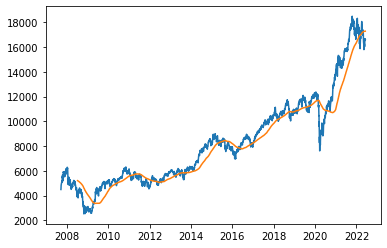

In [46]:
import matplotlib.pyplot as plt

plt.plot(df['Adj Close'])
plt.plot(df['MA200'])
plt.show()

In [47]:
df['price change'] = df['Adj Close'].pct_change()
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,MA200,price change
Date,,,,,,,,
2008-07-07,4002.000000,4114.500000,4002.000000,4030.000000,4030.000000,0,5210.716744,0.003486
2008-07-08,4028.699951,4028.699951,3896.050049,3988.550049,3988.550049,0,5208.186245,-0.010285
2008-07-09,3990.899902,4169.399902,3990.899902,4157.100098,4157.100098,0,5206.240745,0.042258
2008-07-10,4155.649902,4187.950195,4110.399902,4162.200195,4162.200195,0,5203.389995,0.001227
2008-07-11,4166.000000,4215.500000,4014.449951,4049.000000,4049.000000,0,5199.897246,-0.027197
...,...,...,...,...,...,...,...,...
2022-05-31,16578.449219,16690.750000,16521.900391,16584.550781,16584.550781,651600,17265.169497,-0.004612
2022-06-01,16594.400391,16649.199219,16438.849609,16522.750000,16522.750000,249600,17266.382749,-0.003726
2022-06-02,16481.650391,16646.400391,16443.050781,16628.000000,16628.000000,236000,17268.111499,0.006370


In [48]:
df['upmove'] = df['price change'].apply(lambda x: x if x>0 else 0)
df['downmove'] = df['price change'].apply(lambda x: abs(x) if x<0 else 0)
df['avg up'] = df['upmove'].ewm(span=19).mean()
df['avg down'] = df['downmove'].ewm(span=19).mean()
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,upmove,downmove,avg up,avg down
Date,,,,,,,,,,,,
2008-07-07,4002.000000,4114.500000,4002.000000,4030.000000,4030.000000,0,5210.716744,0.003486,0.003486,0.000000,0.008888,0.014129
2008-07-08,4028.699951,4028.699951,3896.050049,3988.550049,3988.550049,0,5208.186245,-0.010285,0.000000,0.010285,0.008000,0.013745
2008-07-09,3990.899902,4169.399902,3990.899902,4157.100098,4157.100098,0,5206.240745,0.042258,0.042258,0.000000,0.011425,0.012370
2008-07-10,4155.649902,4187.950195,4110.399902,4162.200195,4162.200195,0,5203.389995,0.001227,0.001227,0.000000,0.010406,0.011133
2008-07-11,4166.000000,4215.500000,4014.449951,4049.000000,4049.000000,0,5199.897246,-0.027197,0.000000,0.027197,0.009365,0.012740
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,16578.449219,16690.750000,16521.900391,16584.550781,16584.550781,651600,17265.169497,-0.004612,0.000000,0.004612,0.006236,0.004707
2022-06-01,16594.400391,16649.199219,16438.849609,16522.750000,16522.750000,249600,17266.382749,-0.003726,0.000000,0.003726,0.005613,0.004609
2022-06-02,16481.650391,16646.400391,16443.050781,16628.000000,16628.000000,236000,17268.111499,0.006370,0.006370,0.000000,0.005688,0.004148


In [49]:
df['RS'] = df['avg up']/df['avg down']
df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,upmove,downmove,avg up,avg down,RS,RSI
Date,,,,,,,,,,,,,,
2008-07-07,4002.000000,4114.500000,4002.000000,4030.000000,4030.000000,0,5210.716744,0.003486,0.003486,0.000000,0.008888,0.014129,0.629089,38.615983
2008-07-08,4028.699951,4028.699951,3896.050049,3988.550049,3988.550049,0,5208.186245,-0.010285,0.000000,0.010285,0.008000,0.013745,0.582013,36.789379
2008-07-09,3990.899902,4169.399902,3990.899902,4157.100098,4157.100098,0,5206.240745,0.042258,0.042258,0.000000,0.011425,0.012370,0.923630,48.014943
2008-07-10,4155.649902,4187.950195,4110.399902,4162.200195,4162.200195,0,5203.389995,0.001227,0.001227,0.000000,0.010406,0.011133,0.934649,48.311050
2008-07-11,4166.000000,4215.500000,4014.449951,4049.000000,4049.000000,0,5199.897246,-0.027197,0.000000,0.027197,0.009365,0.012740,0.735114,42.366905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,16578.449219,16690.750000,16521.900391,16584.550781,16584.550781,651600,17265.169497,-0.004612,0.000000,0.004612,0.006236,0.004707,1.325013,56.989493
2022-06-01,16594.400391,16649.199219,16438.849609,16522.750000,16522.750000,249600,17266.382749,-0.003726,0.000000,0.003726,0.005613,0.004609,1.217875,54.911801
2022-06-02,16481.650391,16646.400391,16443.050781,16628.000000,16628.000000,236000,17268.111499,0.006370,0.006370,0.000000,0.005688,0.004148,1.371454,57.831774


In [50]:
df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,upmove,downmove,avg up,avg down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2008-07-07,4002.000000,4114.500000,4002.000000,4030.000000,4030.000000,0,5210.716744,0.003486,0.003486,0.000000,0.008888,0.014129,0.629089,38.615983,No
2008-07-08,4028.699951,4028.699951,3896.050049,3988.550049,3988.550049,0,5208.186245,-0.010285,0.000000,0.010285,0.008000,0.013745,0.582013,36.789379,No
2008-07-09,3990.899902,4169.399902,3990.899902,4157.100098,4157.100098,0,5206.240745,0.042258,0.042258,0.000000,0.011425,0.012370,0.923630,48.014943,No
2008-07-10,4155.649902,4187.950195,4110.399902,4162.200195,4162.200195,0,5203.389995,0.001227,0.001227,0.000000,0.010406,0.011133,0.934649,48.311050,No
2008-07-11,4166.000000,4215.500000,4014.449951,4049.000000,4049.000000,0,5199.897246,-0.027197,0.000000,0.027197,0.009365,0.012740,0.735114,42.366905,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,16578.449219,16690.750000,16521.900391,16584.550781,16584.550781,651600,17265.169497,-0.004612,0.000000,0.004612,0.006236,0.004707,1.325013,56.989493,No
2022-06-01,16594.400391,16649.199219,16438.849609,16522.750000,16522.750000,249600,17266.382749,-0.003726,0.000000,0.003726,0.005613,0.004609,1.217875,54.911801,No
2022-06-02,16481.650391,16646.400391,16443.050781,16628.000000,16628.000000,236000,17268.111499,0.006370,0.006370,0.000000,0.005688,0.004148,1.371454,57.831774,No


In [51]:
PnL = []

for i in range(len(df) - 12):
    if df['Buy'].iloc[i] is 'Yes':
         for j in range(1,11):
            if df['RSI'].iloc[i + j] > 40:
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
                break
            elif j == 10:
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])

PnL

[16.39990234375,
 55.25,
 200.2001953125,
 -274.0,
 -215.5,
 -105.75,
 -38.25,
 -54.14990234375,
 -79.9501953125,
 -3.10009765625,
 72.5498046875,
 163.14990234375,
 81.0498046875,
 82.7998046875,
 50.7001953125,
 114.5,
 80.75,
 38.85009765625,
 31.5,
 113.94970703125,
 111.69970703125,
 93.94970703125,
 87.9501953125,
 70.14990234375,
 139.94970703125,
 83.2998046875,
 213.7998046875,
 116.10009765625,
 131.599609375,
 136.6494140625,
 -468.25,
 189.7998046875,
 147.94921875,
 135.0,
 -11.0,
 77.7001953125,
 173.25,
 -638.1005859375,
 -380.75,
 -204.5498046875,
 393.2001953125,
 500.25,
 471.55078125,
 -556.849609375,
 -364.3505859375,
 -391.2001953125,
 -159.5498046875,
 -219.599609375,
 -125.7998046875,
 219.599609375,
 378.19921875,
 722.5,
 143.150390625,
 369.099609375,
 373.75,
 320.5,
 293.650390625]

In [52]:
p = 0

for i in range(len(PnL)):
    p += PnL[i]
    
p

2905.24658203125